In [54]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [55]:
# Load the Excel file
df = pd.read_excel(r"C:\Users\DELL\OneDrive\Desktop\nlp_project\Combined_Data_telugu.xlsx")


In [56]:
# Check the shape of the data:
df.shape

(53043, 3)

In [57]:
df.head()

Unnamed: 0                                          statement  status
0           0                                              అయ్యో  ఆందోళన
1           1  నిద్రకు ఇబ్బంది, గందరగోళంగా ఉన్న మనస్సు, చంచలమ...  ఆందోళన
2           2  అన్ని తప్పు, వెనుకకు డియర్, ఫార్వర్డ్ డౌట్. చం...  ఆందోళన
3           3  నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను, కానీ ...  ఆందోళన
4           4  నేను అశాంతి మరియు అశాంతిగా ఉన్నాను, ఇది ఒక నెల...  ఆందోళన

In [58]:
df.info() # there is a few nan in 'statement' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   53042 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [59]:
#Check the number of duplicated rows
df.duplicated().sum()

0

In [60]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
df.T.duplicated().sum()

0

In [61]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0    0
statement     1
status        0
dtype: int64


In [62]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

statement    0.001885
dtype: float64

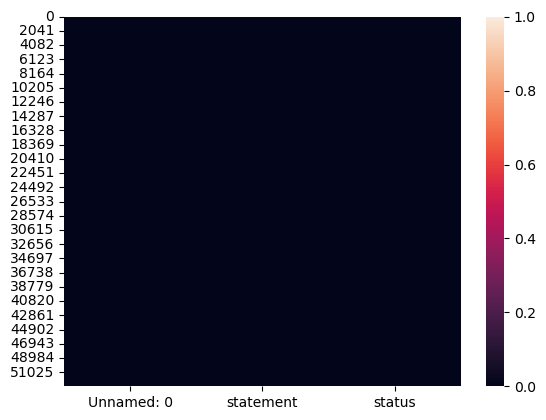

In [63]:
# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.show()

In [11]:
df.describe()

Unnamed: 0
count  53043.000000
mean   26521.000000
std    15312.339501
min        0.000000
25%    13260.500000
50%    26521.000000
75%    39781.500000
max    53042.000000

In [64]:
# Loop through all categorical columns in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Print the count of unique values in each column
    print(df[column].value_counts())


#VALUE!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [65]:
df['status'].unique()

array(['ఆందోళన', 'సాధారణ', 'డిప్రెషన్', 'ఆత్మహత్య', 'ఒత్తిడి', 'బైపోలార్',
       'వ్యక్తిత్వ క్రమరాహిత్యం'], dtype=object)

In [66]:
df['status'].value_counts()

సాధారణ                     16351
డిప్రెషన్                  15404
ఆత్మహత్య                   10653
ఆందోళన                      3888
బైపోలార్                    2877
ఒత్తిడి                     2669
వ్యక్తిత్వ క్రమరాహిత్యం     1201
Name: status, dtype: int64

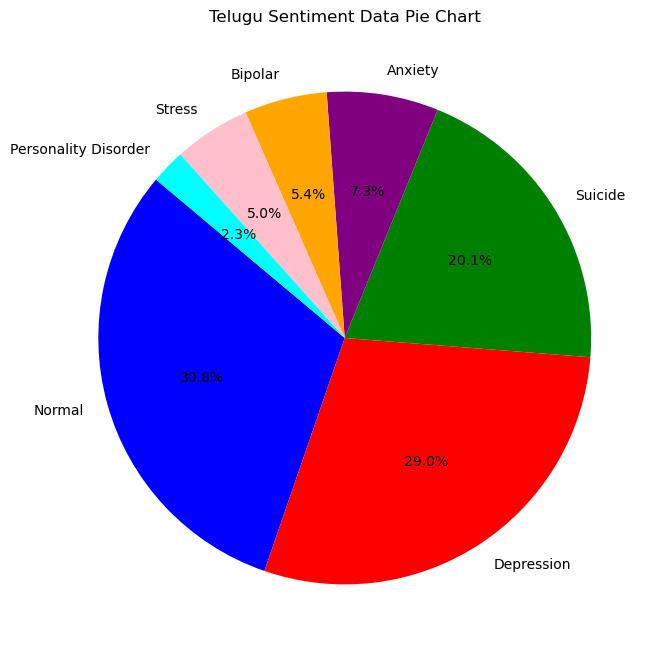

In [67]:
import matplotlib.pyplot as plt

# Data
labels = ['Normal', 'Depression', 'Suicide', 'Anxiety', 'Bipolar', 'Stress', 'Personality Disorder']
values = [16351, 15404, 10653, 3888, 2877, 2669, 1201]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'purple', 'orange', 'pink', 'cyan'])
plt.title('Telugu Sentiment Data Pie Chart')
plt.show()


In [68]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

# Load dataset
file_path = r"C:\Users\DELL\OneDrive\Desktop\nlp_project\Combined_Data_telugu.xlsx"
df = pd.read_excel(file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'statement' not in df.columns:
    raise ValueError("Error: 'statement' column not found!")

# Telugu stopwords we will extend as needed
telugu_stopwords = set(["ఉంది", "ఇది", "అంటే", "కాని", "మాత్రం", "కూడా", "మీ", "నాకు", "తప్ప", "అయినా", "కాదు", "నిజం", "వంటి", "అలాగే", "మరియు", "గురించి", "చేసింది", "వారు", "తన", "అవి", "దీని", "ద్వారా", "అక్కడ", "ఇక్కడ", "ఎవరైనా", "ఎందుకు"])

# Function to clean text
def preprocess_telugu_text(text):
    if pd.isna(text):  
        return ""  
    # Remove special characters, numbers, emojis, and punctuations
    text = re.sub(r'[^\u0C00-\u0C7F\s]', '', text)  # Keep only Telugu characters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    # Remove stopwords
    words = text.split()
    cleaned_words = [word for word in words if word not in telugu_stopwords]
    return ' '.join(cleaned_words)

# Apply preprocessing
df['cleaned_statement'] = df['statement'].astype(str).apply(preprocess_telugu_text)

# Drop empty rows after preprocessing
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(subset=['cleaned_statement'], inplace=True)

# Tokenization using NLTK
nltk.download('punkt')
df['tokenized_statement'] = df['cleaned_statement'].apply(lambda x: word_tokenize(x))

# Save processed dataset
output_path = r"C:\Users\DELL\OneDrive\Desktop\nlp_project\Processed_Telugu_Data.xlsx"
df.to_excel(output_path, index=False)

print("Preprocessing and Tokenization Completed Successfully!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing and Tokenization Completed Successfully!


In [69]:
# Print original, cleaned, and tokenized text
for index, row in df.head(10).iterrows():
    print(f"Original: {row['statement']}")
    print(f"Cleaned: {row['cleaned_statement']}")
    print(f"Tokens: {row['tokenized_statement']}")
    print("-")


Original: అయ్యో
Cleaned: అయ్యో
Tokens: ['అయ్యో']
-
Original: నిద్రకు ఇబ్బంది, గందరగోళంగా ఉన్న మనస్సు, చంచలమైన హృదయం. అన్నీ శృతి మించాయి
Cleaned: నిద్రకు ఇబ్బంది గందరగోళంగా ఉన్న మనస్సు చంచలమైన హృదయం అన్నీ శృతి మించాయి
Tokens: ['నిద్రకు', 'ఇబ్బంది', 'గందరగోళంగా', 'ఉన్న', 'మనస్సు', 'చంచలమైన', 'హృదయం', 'అన్నీ', 'శృతి', 'మించాయి']
-
Original: అన్ని తప్పు, వెనుకకు డియర్, ఫార్వర్డ్ డౌట్. చంచలమైన మరియు చంచలమైన ప్రదేశంలో ఉండండి
Cleaned: అన్ని తప్పు వెనుకకు డియర్ ఫార్వర్డ్ డౌట్ చంచలమైన చంచలమైన ప్రదేశంలో ఉండండి
Tokens: ['అన్ని', 'తప్పు', 'వెనుకకు', 'డియర్', 'ఫార్వర్డ్', 'డౌట్', 'చంచలమైన', 'చంచలమైన', 'ప్రదేశంలో', 'ఉండండి']
-
Original: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను, కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Cleaned: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Tokens: ['నేను', 'నా', 'దృష్టిని', 'వేరొకదానిపైకి', 'మార్చాను', 'కానీ', 'నేను', 'ఇంకా', 'ఆందోళన', 'చెందుతున్నాను']
-
Original: నేను అశాంతి మరియు అశాంతిగా ఉన్నాను, ఇది ఒక నెల అయ్యింది, అబ్బాయి. మీ ఉద్దేశ్యం ఏ

In [70]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load preprocessed dataset
preprocessed_file_path = r"C:\Users\DELL\OneDrive\Desktop\nlp_project\Processed_Telugu_Data.xlsx"
df = pd.read_excel(preprocessed_file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'cleaned_statement' not in df.columns:
    raise ValueError("Error: 'cleaned_statement' column not found in the preprocessed dataset!")

# Tokenization using NLTK
nltk.download('punkt')
df['tokenized_statement'] = df['cleaned_statement'].apply(lambda x: word_tokenize(str(x)))

# Print tokenized text
for index, row in df.head(10).iterrows():
    print(f"Cleaned: {row['cleaned_statement']}")
    print(f"Tokens: {row['tokenized_statement']}")
    print("-")

print("Tokenization Completed and Displayed Successfully!")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaned: అయ్యో
Tokens: ['అయ్యో']
-
Cleaned: నిద్రకు ఇబ్బంది గందరగోళంగా ఉన్న మనస్సు చంచలమైన హృదయం అన్నీ శృతి మించాయి
Tokens: ['నిద్రకు', 'ఇబ్బంది', 'గందరగోళంగా', 'ఉన్న', 'మనస్సు', 'చంచలమైన', 'హృదయం', 'అన్నీ', 'శృతి', 'మించాయి']
-
Cleaned: అన్ని తప్పు వెనుకకు డియర్ ఫార్వర్డ్ డౌట్ చంచలమైన చంచలమైన ప్రదేశంలో ఉండండి
Tokens: ['అన్ని', 'తప్పు', 'వెనుకకు', 'డియర్', 'ఫార్వర్డ్', 'డౌట్', 'చంచలమైన', 'చంచలమైన', 'ప్రదేశంలో', 'ఉండండి']
-
Cleaned: నేను నా దృష్టిని వేరొకదానిపైకి మార్చాను కానీ నేను ఇంకా ఆందోళన చెందుతున్నాను
Tokens: ['నేను', 'నా', 'దృష్టిని', 'వేరొకదానిపైకి', 'మార్చాను', 'కానీ', 'నేను', 'ఇంకా', 'ఆందోళన', 'చెందుతున్నాను']
-
Cleaned: నేను అశాంతి అశాంతిగా ఉన్నాను ఒక నెల అయ్యింది అబ్బాయి ఉద్దేశ్యం ఏమిటి
Tokens: ['నేను', 'అశాంతి', 'అశాంతిగా', 'ఉన్నాను', 'ఒక', 'నెల', 'అయ్యింది', 'అబ్బాయి', 'ఉద్దేశ్యం', 'ఏమిటి']
-
Cleaned: ప్రతి విరామంలో ఏదో తప్పు జరిగినట్లు మీరు భయపడి ఉండాలి కానీ ఏమి లేదు
Tokens: ['ప్రతి', 'విరామంలో', 'ఏదో', 'తప్పు', 'జరిగినట్లు', 'మీరు', 'భయపడి', 'ఉండాలి', 'కానీ', 'ఏమి', 'లేద

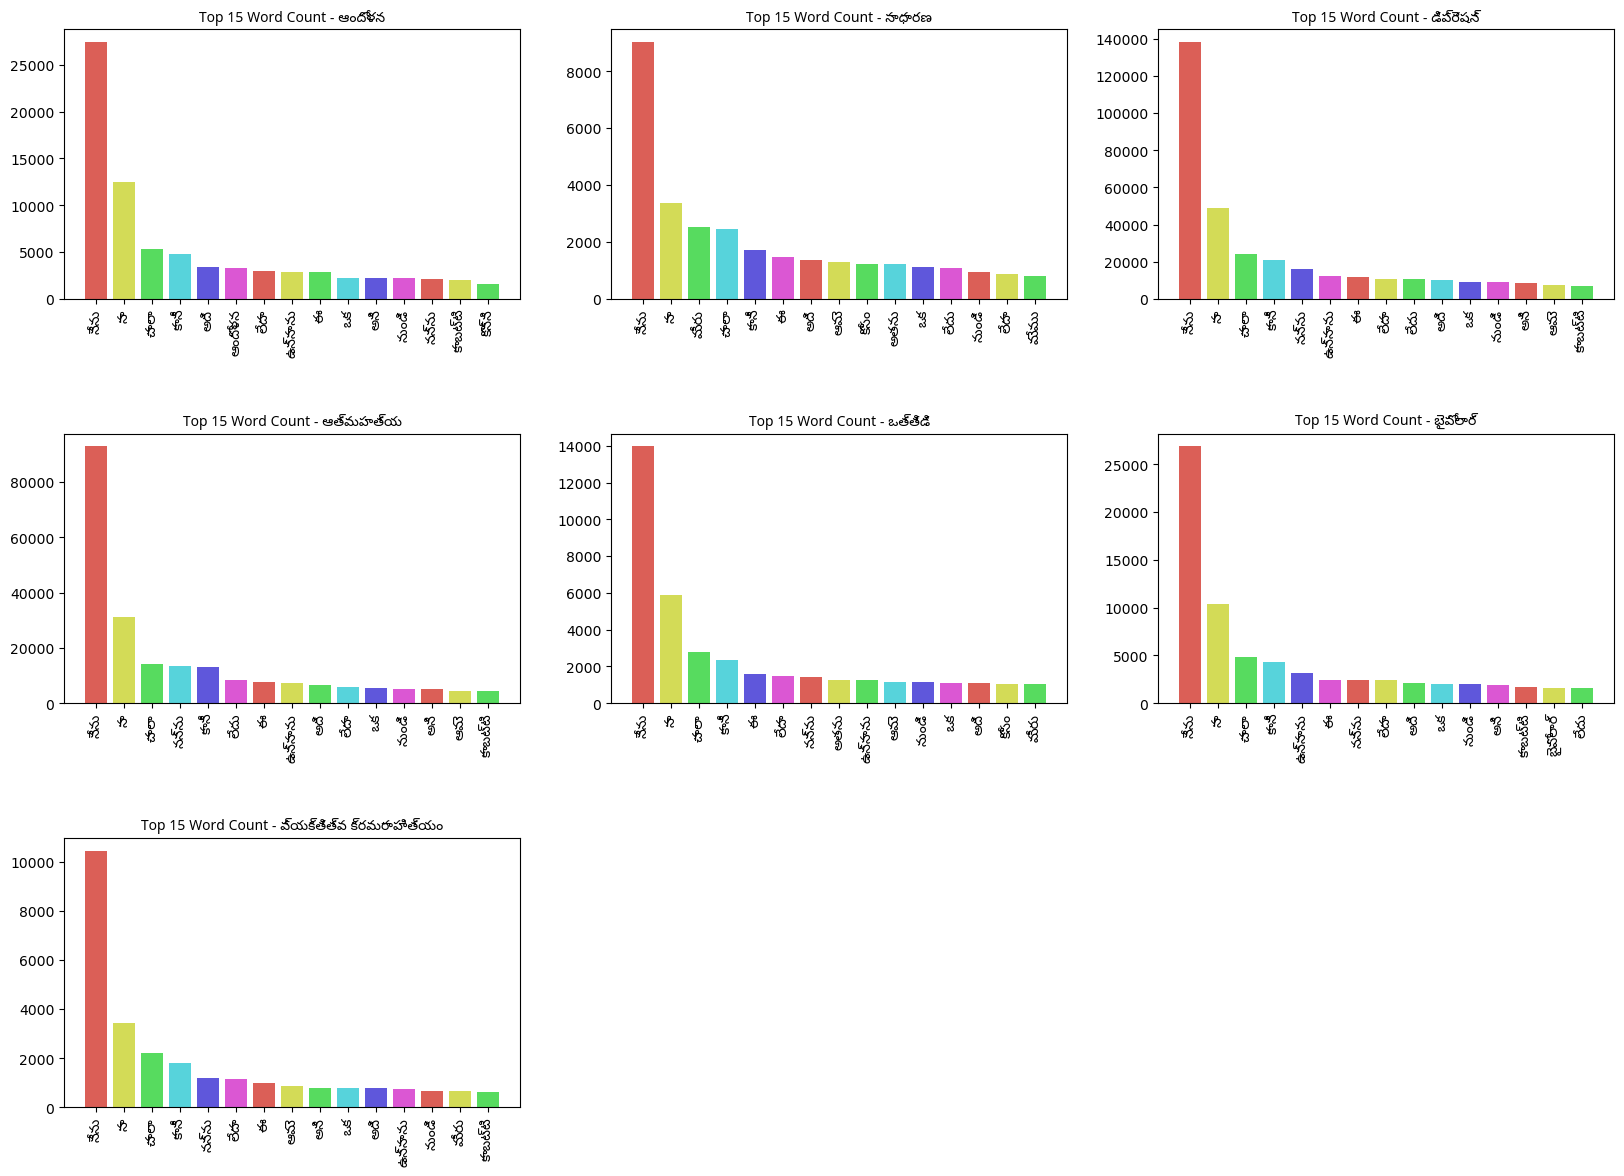

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set font that supports Telugu
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"  # Update with the correct path
telugu_font = fm.FontProperties(fname=telugu_font_path)

# Plot word counts
plt.figure(figsize=(20, 14))
i = 1

# Get unique sentiment/emotion labels
unique_status = df['status'].unique()
for status in unique_status:
    plt.subplot(3, 3, i)
    plt.title(f'Top 15 Word Count - {status}', fontsize=14, fontproperties=telugu_font)
    plt.bar(word_count[f'{status}_words'], word_count[f'{status}_count'], color=sns.color_palette('hls'))
    plt.xticks(rotation=90, fontsize=12, fontproperties=telugu_font)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
plt.rcParams['font.family'] = 'Noto Sans Telugu'


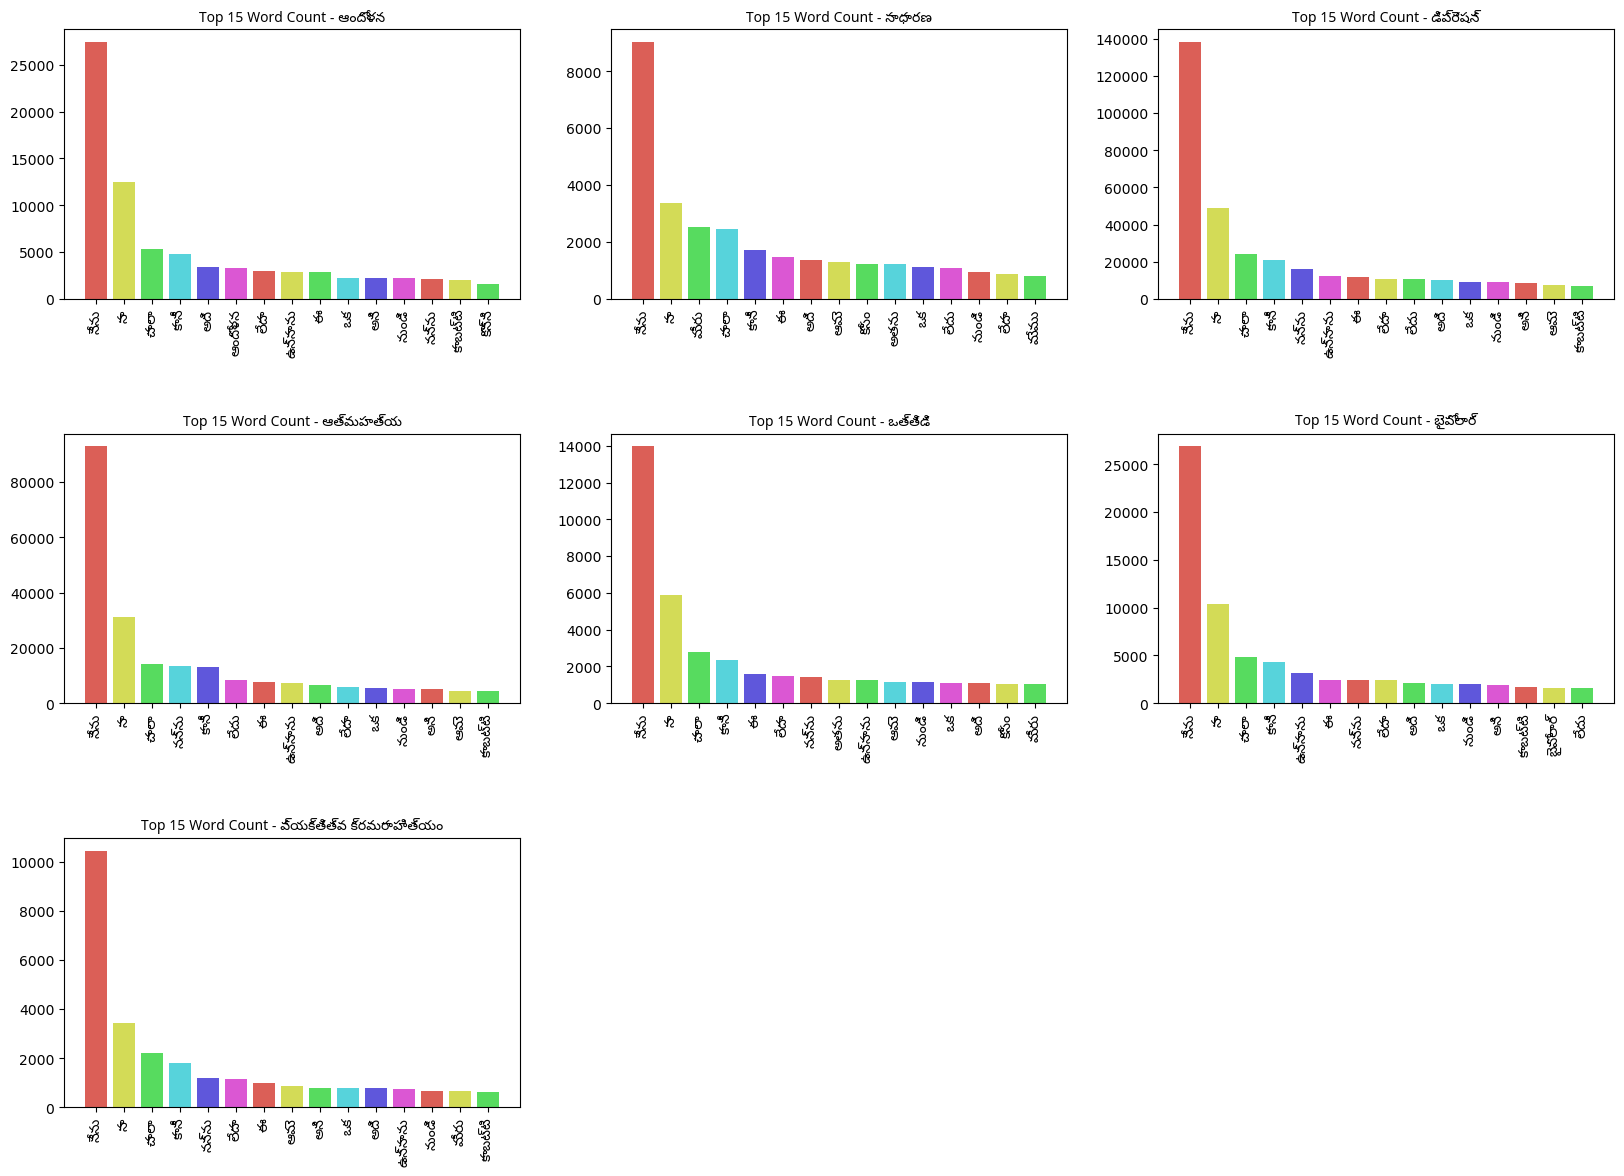

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# Load preprocessed dataset
preprocessed_file_path = r"C:\Users\DELL\OneDrive\Desktop\nlp_project\Processed_Telugu_Data.xlsx"
df = pd.read_excel(preprocessed_file_path)

# Ensure correct column names
df.columns = df.columns.str.strip()
if 'cleaned_statement' not in df.columns:
    raise ValueError("Error: 'cleaned_statement' column not found in the preprocessed dataset!")
if 'status' not in df.columns:
    raise ValueError("Error: 'status' column not found in the dataset!")

# Set font that supports Telugu
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path)

# Extract word count feature
df['word_count'] = df['cleaned_statement'].apply(lambda x: len(str(x).split()))

# Get unique sentiment/emotion labels
unique_status = df['status'].unique()

# Store words per status
words_status = {}
word_count = pd.DataFrame()

for status in unique_status:
    word_dict = {}
    word_ls = []
    
    # Filter data for the specific status
    s_data = df[df['status'] == status]
    
    # Concatenate all words
    all_words = ' '.join(s_data['cleaned_statement'].astype(str))
    
    # Count word occurrences
    for word in all_words.split():
        word_dict[word] = word_dict.get(word, 0) + 1
        word_ls.append(word)
    
    words_status[status] = ' '.join(word_ls)
    
    # Get top 15 words
    sorted_words = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
    word_top_count = pd.DataFrame(sorted_words[:15], columns=[f'{status}_words', f'{status}_count'])
    
    # Concatenate results
    word_count = pd.concat([word_count, word_top_count], axis=1)

# Plot word counts
plt.figure(figsize=(20, 14))
i = 1

for status in unique_status:
    plt.subplot(3, 3, i)
    plt.title(f'Top 15 Word Count - {status}', fontsize=14, fontproperties=telugu_font)
    plt.bar(word_count[f'{status}_words'], word_count[f'{status}_count'], color=sns.color_palette('hls'))
    plt.xticks(rotation=90, fontsize=12, fontproperties=telugu_font)
    i += 1

plt.subplots_adjust(hspace=0.5)
plt.show()


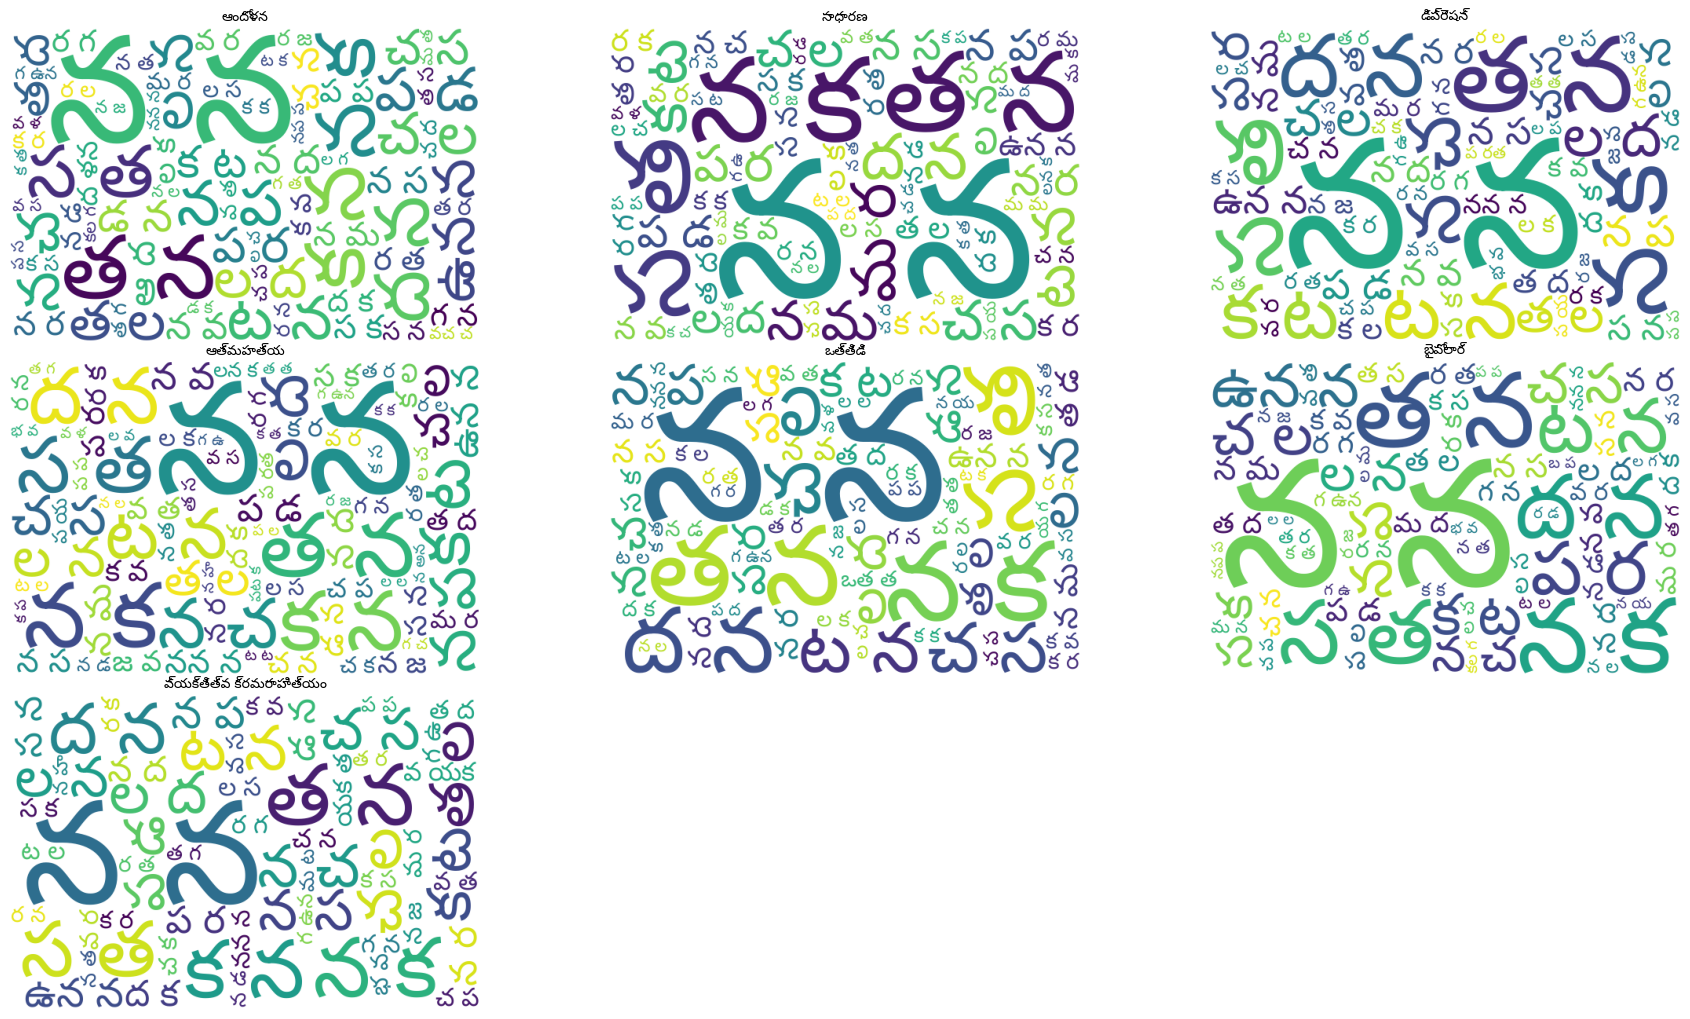

In [18]:
from wordcloud import WordCloud
# Generate and display word clouds with Telugu font
plt.figure(figsize=(18, 10))
i = 1
for status in words_status:
    plt.subplot(3, 3, i)
    w = words_status[status]
    wordcloud = WordCloud(width=600, height=400,
                          background_color='white',
                          min_font_size=20,
                          font_path=telugu_font_path # Add Telugu font path here
                          ).generate(w)
    # Plot the WordCloud image                        
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(status, fontsize=18, fontproperties=telugu_font)
    plt.tight_layout(pad=0)
    i += 1
plt.show()


In [72]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# Apply CountVectorizer and TfidfTransformer
count = CountVectorizer()
count.fit(df['cleaned_statement'])
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf.fit(count.transform(df['cleaned_statement']))
np.set_printoptions(precision=2)
tfidf_words = tfidf.transform(count.transform(df['cleaned_statement']))

In [73]:
import pandas as pd
from scipy.sparse import hstack

# Sentence length (number of words)
df['sentence_len'] = df['cleaned_statement'].apply(lambda x: len(x.split()))

# Average word length
df['avg_word_len'] = df['cleaned_statement'].apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0)

# Convert to array and reshape to 2D
lexical_features = df[['sentence_len', 'avg_word_len']].values


In [ ]:
pip install --upgrade transformers


In [ ]:
pip install --upgrade transformers torch accelerate


In [ ]:
pip uninstall transformers accelerate torch -y


In [ ]:
pip install transformers==4.36.2 accelerate==0.26.1 torch==2.1.2


In [21]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load MuRIL tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModel.from_pretrained("google/muril-base-cased")
model.eval()

# Function to get [CLS] token embedding
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_dim]
    return cls_embedding.squeeze().numpy()

# Example Telugu text
telugu_text = "ఈ రోజు నాకు చాలా బాధగా ఉంది."
embedding = get_embedding(telugu_text)
print("Embedding shape:", embedding.shape)




C:\Users\DELL\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Embedding shape: (768,)


In [ ]:
pip install stanza
# Download Telugu language model (only once)
stanza.download('te')

In [ ]:
import stanza

# Load pipeline
nlp = stanza.Pipeline('te')


In [ ]:
import pandas as pd

# Load existing CSV
csv_path = "muril_embeddings_partial.csv"
parquet_path = "muril_embeddings_partial.parquet"

df_csv = pd.read_csv(csv_path, header=None)

# Rename columns to string type (required for Parquet)
df_csv.columns = [str(col) for col in df_csv.columns]

# Save as Parquet
df_csv.to_parquet(parquet_path, index=False)
print(f"Converted {csv_path} to {parquet_path}")


In [22]:
from tqdm import tqdm 
import numpy as np
import pandas as pd
import os
from scipy.sparse import csr_matrix, hstack

# === CONFIGURATION ===
partial_path = "muril_embeddings_partial.csv"
final_embeddings_path = "muril_embeddings_final.npy"
final_csv_path = "total_combined_features.csv"

# === LOAD EXISTING EMBEDDINGS IF AVAILABLE ===
muril_embeddings = []

if os.path.exists(partial_path):
    existing_df = pd.read_csv(partial_path)
    muril_embeddings = existing_df.values.tolist()
    start_idx = len(muril_embeddings)
    print(f"Resuming from index {start_idx}")
else:
    start_idx = 0
    print("Starting fresh...")

# === LOAD MAIN DATAFRAME (assuming df is already loaded) ===
# Add missing sentence_len if not present
if 'sentence_len' not in df.columns:
    df['sentence_len'] = df['cleaned_statement'].apply(lambda x: len(x.split()))

# === MURIL EMBEDDING EXTRACTION ===
print("Extracting MuRIL embeddings...")

try:
    for i in tqdm(range(start_idx, len(df)), desc="Embedding"):
        text = df['cleaned_statement'].iloc[i]
        embedding = get_embedding(text)  # Your function
        muril_embeddings.append(embedding)

        # Optionally save every 1000 steps to avoid full loss
        if i % 1000 == 0:
            pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)

except KeyboardInterrupt:
    print("Interrupted. Saving progress...")
    pd.DataFrame(muril_embeddings).to_csv(partial_path, index=False)
    raise

# Save final version
muril_embeddings_array = np.vstack(muril_embeddings)
np.save(final_embeddings_path, muril_embeddings_array)
pd.DataFrame(muril_embeddings_array).to_csv(partial_path, index=False)
print(f"✅ Saved embeddings to {partial_path} and {final_embeddings_path}")

# === HANDCRAFTED FEATURES ===
df['unique_word_count'] = df['cleaned_statement'].apply(lambda x: len(set(x.split())))
df['unique_to_total_ratio'] = df.apply(
    lambda row: row['unique_word_count'] / row['sentence_len'] if row['sentence_len'] > 0 else 0, axis=1)
df['has_repeats'] = df['cleaned_statement'].apply(
    lambda x: 1 if len(x.split()) != len(set(x.split())) else 0)

# === MERGE WITH OTHER FEATURES ===
additional_features = df[['unique_word_count', 'unique_to_total_ratio', 'has_repeats']].values
dense_features = np.hstack([lexical_features, additional_features])  # assumes lexical_features already exists

combined_features = hstack([
    tfidf_words,  # assumes this exists
    csr_matrix(dense_features),
    csr_matrix(muril_embeddings_array)
])

# === FINAL SAVE ===
combined_df = pd.DataFrame(combined_features.toarray())
combined_df.to_csv(final_csv_path, index=False)
print(f"🎉 Final combined feature matrix saved to: {final_csv_path}")


Resuming from index 52383
Extracting MuRIL embeddings...


Embedding: 0it [00:00, ?it/s]


✅ Saved embeddings to muril_embeddings_partial.csv and muril_embeddings_final.npy
🎉 Final combined feature matrix saved to: total_combined_features.csv


In [23]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix

# === LOAD COMBINED FEATURES ===
final_csv_path = "total_combined_features.csv"
combined_df = pd.read_csv(final_csv_path)
combined_features = csr_matrix(combined_df.values)  # Convert dense to sparse


In [24]:
from sklearn.preprocessing import LabelEncoder
# Encode status labels
label_encoder = LabelEncoder()
label_encoder.fit(df['status'])
status_encoder = label_encoder.transform(df['status'])

# Display encoded labels
print("Encoded Status Labels:")
for original, encoded in zip(df['status'].unique(), label_encoder.transform(df['status'].unique())):
    print(f"{original} -> {encoded}")


Encoded Status Labels:
ఆందోళన -> 0
సాధారణ -> 6
డిప్రెషన్ -> 3
ఆత్మహత్య -> 1
ఒత్తిడి -> 2
బైపోలార్ -> 4
వ్యక్తిత్వ క్రమరాహిత్యం -> 5


In [26]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    combined_features,
    status_encoder,  # Already encoded labels
    test_size=0.3,
    random_state=7,
    stratify=status_encoder
)

print("✅ Data split into training and test sets successfully.")


✅ Data split into training and test sets successfully.


In [74]:
print("✅ Data split into training and test sets successfully.")
print(f"train_x shape: {train_x.shape}")
print(f"test_x shape:  {test_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_y shape:  {test_y.shape}")

✅ Data split into training and test sets successfully.
train_x shape: (36668, 5816)
test_x shape:  (15715, 5816)
train_y shape: (36668,)
test_y shape:  (15715,)


In [75]:
print("Unique classes in train_y:", np.unique(train_y))
print("Train class distribution:", np.bincount(train_y))
print("Test class distribution:", np.bincount(test_y))


Unique classes in train_y: [0 1 2 3 4 5 6]
Train class distribution: [ 2689  7450  1808 10763  1944   754 11260]
Test class distribution: [1152 3193  775 4613  833  323 4826]


In [ ]:
pip install lightgbm


In [27]:
import lightgbm as lgb

lightGbm = lgb.LGBMClassifier()
lightGbm.fit(train_x,train_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.539167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327380
[LightGBM] [Info] Number of data points in the train set: 36668, number of used features: 2260
[LightGBM] [Info] Start training from score -2.612735
[LightGBM] [Info] Start training from score -1.593690
[LightGBM] [Info] Start training from score -3.009683
[LightGBM] [Info] Start training from score -1.225790
[LightGBM] [Info] Start training from score -2.937157
[LightGBM] [Info] Start training from score -3.884267
[LightGBM] [Info] Start training from score -1.180648


LGBMClassifier()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.77      0.61      0.68      1152
           1       0.60      0.52      0.55      3193
           2       0.69      0.40      0.50       775
           3       0.57      0.71      0.63      4613
           4       0.74      0.44      0.55       833
           5       0.80      0.25      0.38       323
           6       0.86      0.93      0.90      4826

    accuracy                           0.69     15715
   macro avg       0.72      0.55      0.60     15715
weighted avg       0.70      0.69      0.69     15715



C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils

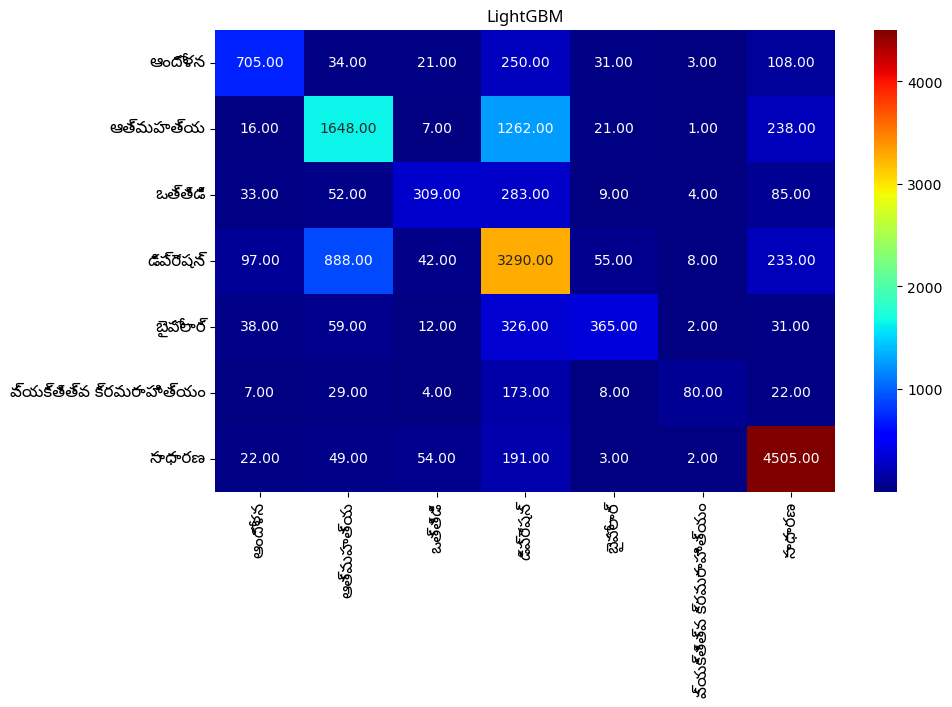

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.font_manager as fm

# Define the Telugu font path
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"

# Load the Telugu font
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# Predict labels
y_pred = lightGbm.predict(test_x)

# Print classification report
print(classification_report(test_y, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Get Telugu labels correctly
ticks_label = label_encoder.inverse_transform(np.unique(test_y))

# Plot heatmap
plt.figure(figsize=(10,6))
plt.title('LightGBM', fontproperties=telugu_font)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='jet', xticklabels=ticks_label, yticklabels=ticks_label)

# Apply Telugu font to tick labels
plt.xticks(fontproperties=telugu_font)
plt.yticks(fontproperties=telugu_font)

# Show plot
plt.show()


In [29]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(n_estimators=50,random_state=7)
randomforest_model.fit(train_x,train_y)

RandomForestClassifier(n_estimators=50, random_state=7)

              precision    recall  f1-score   support

           0       0.85      0.23      0.36      1152
           1       0.46      0.28      0.35      3193
           2       0.98      0.16      0.28       775
           3       0.46      0.75      0.57      4613
           4       0.92      0.18      0.30       833
           5       1.00      0.21      0.34       323
           6       0.79      0.91      0.84      4826

    accuracy                           0.59     15715
   macro avg       0.78      0.39      0.44     15715
weighted avg       0.65      0.59      0.56     15715



C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils

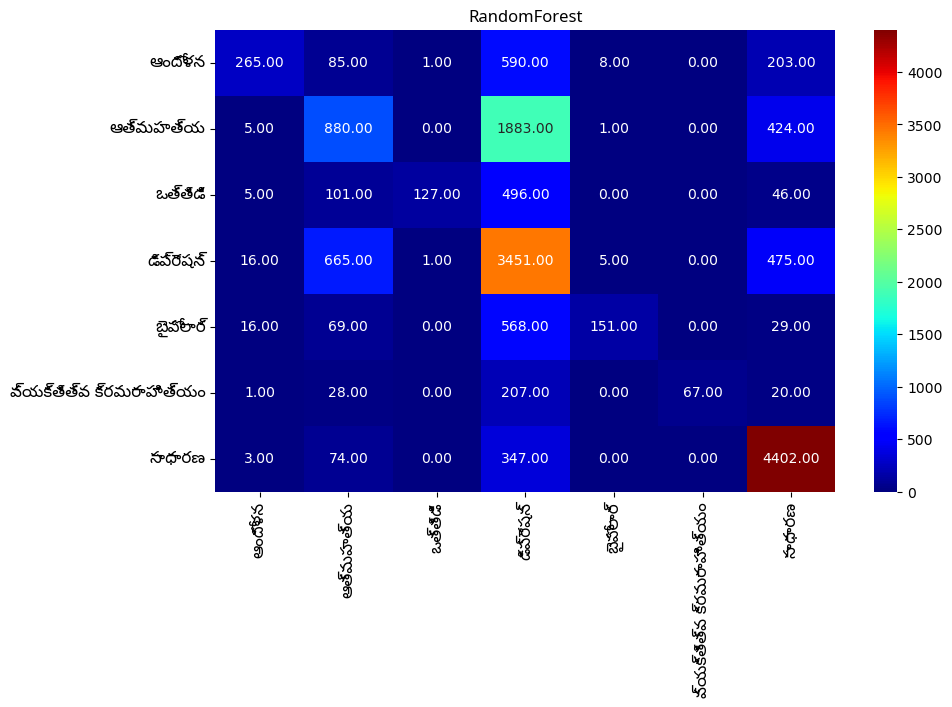

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.font_manager as fm

# Define the Telugu font path
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"

# Load the Telugu font
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# Predict labels using RandomForest
y_pred = randomforest_model.predict(test_x)

# Print classification report
print(classification_report(test_y, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Get Telugu labels correctly
ticks_label = label_encoder.inverse_transform(np.unique(test_y))

# Plot heatmap
plt.figure(figsize=(10,6))
plt.title('RandomForest', fontproperties=telugu_font)
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='jet', xticklabels=ticks_label, yticklabels=ticks_label)

# Apply Telugu font to tick labels
plt.xticks(fontproperties=telugu_font)
plt.yticks(fontproperties=telugu_font)

# Show plot
plt.show()


In [32]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train the SVM model
svm_clf = LinearSVC()
svm_clf.fit(train_x, train_y)

# 2. Predict on test data
pred_y = svm_clf.predict(test_x)

# 3. Evaluate the model
accuracy = accuracy_score(test_y, pred_y)
report = classification_report(test_y, pred_y)
conf_matrix = confusion_matrix(test_y, pred_y)

# 4. Print evaluation results
print("🔍 SVM Evaluation Results:")
print(f"✅ Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:")
print(report)
print("📉 Confusion Matrix:")
print(conf_matrix)


🔍 SVM Evaluation Results:
✅ Accuracy: 65.61%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      1152
           1       0.58      0.52      0.55      3193
           2       0.57      0.29      0.38       775
           3       0.56      0.64      0.60      4613
           4       0.55      0.33      0.42       833
           5       0.46      0.08      0.14       323
           6       0.79      0.93      0.85      4826

    accuracy                           0.66     15715
   macro avg       0.60      0.48      0.51     15715
weighted avg       0.64      0.66      0.64     15715

📉 Confusion Matrix:
[[ 689   42   22  202   45    4  148]
 [  26 1647   20 1089   28    6  377]
 [  64   86  222  262   28    8  105]
 [ 148  888   62 2975   90    8  442]
 [  39   70   20  362  278    1   63]
 [  12   44    8  178   19   26   36]
 [  34   63   35  199   18    3 4474]]


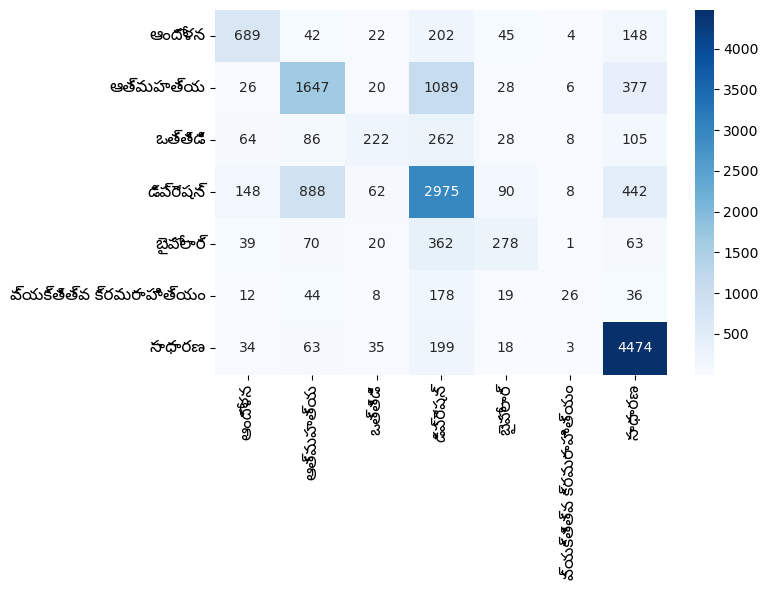

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# === Load Telugu Font ===
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# === Telugu Class Labels ===
class_labels = label_encoder.classes_

# === Plot Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Vertical x-axis labels, horizontal y-axis labels
plt.xticks(rotation=90, fontproperties=telugu_font, ha='center')  # vertical x-axis labels
plt.yticks(rotation=0, fontproperties=telugu_font)


plt.tight_layout()
plt.show()


In [47]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# === STEP 1: Split TF-IDF and Dense Features ===
tfidf_dim = tfidf_words.shape[1]
dense_dim = combined_features.shape[1] - tfidf_dim

X_train_tfidf = train_x[:, :tfidf_dim]
X_test_tfidf = test_x[:, :tfidf_dim]

X_train_dense = train_x[:, tfidf_dim:].toarray()
X_test_dense = test_x[:, tfidf_dim:].toarray()

# === STEP 2: Normalize Features ===
tfidf_scaler = MaxAbsScaler()
X_train_tfidf = tfidf_scaler.fit_transform(X_train_tfidf)
X_test_tfidf = tfidf_scaler.transform(X_test_tfidf)

dense_scaler = StandardScaler()
X_train_dense = dense_scaler.fit_transform(X_train_dense)
X_test_dense = dense_scaler.transform(X_test_dense)

# === STEP 3: Prepare Labels ===
train_y = train_y.astype('int32')
test_y = test_y.astype('int32')
num_classes = len(np.unique(train_y))

# === STEP 4: Define Hybrid Classification Model ===
def build_hybrid_classifier(tfidf_dim, dense_dim, num_classes):
    # TF-IDF input
    tfidf_input = Input(shape=(tfidf_dim,), name='tfidf_input')
    x1 = Dense(256, activation='relu')(tfidf_input)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)

    # Dense feature input
    dense_input = Input(shape=(dense_dim,), name='dense_input')
    x2 = Dense(128, activation='relu')(dense_input)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.3)(x2)

    # Merge both branches
    merged = concatenate([x1, x2])
    x = Dense(128, activation='relu')(merged)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=[tfidf_input, dense_input], outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# === STEP 5: Train the Model ===
model = build_hybrid_classifier(tfidf_dim, dense_dim, num_classes)

# Show Model Summary
print("\n=== Model Summary ===")
model.summary()

# Compute class weights to handle class imbalance
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_y), y=train_y)
class_weight = dict(zip(np.unique(train_y), weights))

# Train the model without EarlyStopping
history = model.fit(
    [X_train_tfidf.toarray(), X_train_dense],
    train_y,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    class_weight=class_weight,
    verbose=1
)



=== Model Summary ===


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ tfidf_input (InputLayer)      │ (None, 5043)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_input (InputLayer)      │ (None, 773)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_32 (Dense)              │ (None, 256)               │       1,291,264 │ tfidf_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_33 (Dense)              │ (None, 128)               │          99,072 │ dense_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_12        │ (None, 256)               │           1,024 │ dense_32[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_13        │ (None, 128)               │             512 │ dense_33[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_24 (Dropout)          │ (None, 256)               │               0 │ batch_normalization_12[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_25 (Dropout)          │ (None, 128)               │               0 │ batch_normalization_13[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_8 (Concatenate)   │ (None, 384)               │               0 │ dropout_24[0][0],          │
│                               │                           │                 │ dropout_25[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_34 (Dense)              │ (None, 128)               │          49,280 │ concatenate_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_26 (Dropout)          │ (None, 128)               │               0 │ dense_34[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_35 (Dense)              │ (None, 7)                 │             903 │ dropout_26[0][0]           │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,442,055 (5.50 MB)

 Trainable params: 1,441,287 (5.50 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.3227 - loss: 2.0201 - val_accuracy: 0.4763 - val_loss: 1.4040
Epoch 2/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5059 - loss: 1.3535 - val_accuracy: 0.5706 - val_loss: 1.1473
Epoch 3/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5700 - loss: 1.1119 - val_accuracy: 0.5974 - val_loss: 1.0708
Epoch 4/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6133 - loss: 0.9664 - val_accuracy: 0.6137 - val_loss: 1.0252
Epoch 5/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6532 - loss: 0.8255 - val_accuracy: 0.6222 - val_loss: 0.9920
Epoch 6/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6809 - loss: 0.7627 - val_accuracy: 0.6313 - val_loss: 0.9655
Epoch 7/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7085 - loss: 0.6624 - val_accuracy: 0.6321 - val_loss: 0.9638
Epoch 8/30
459/459 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7240 - loss: 0.5926 - 

492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1152
           1       0.53      0.56      0.55      3193
           2       0.42      0.43      0.42       775
           3       0.58      0.55      0.57      4613
           4       0.54      0.57      0.55       833
           5       0.39      0.36      0.37       323
           6       0.87      0.88      0.88      4826

    accuracy                           0.65     15715
   macro avg       0.57      0.57      0.57     15715
weighted avg       0.65      0.65      0.65     15715

Confusion Matrix:
 [[ 766   32   62  136   65   17   74]
 [  52 1781   59 1029   62   31  179]
 [  70   80  331  181   22   15   76]
 [ 203 1171  180 2538  200   74  247]
 [  36   74   32  183  473   12   23]
 [  12   55   19   86   20  115   16]
 [  71  139  100  194   34   29 4259]]
Accuracy Score: 0.6530703149856825


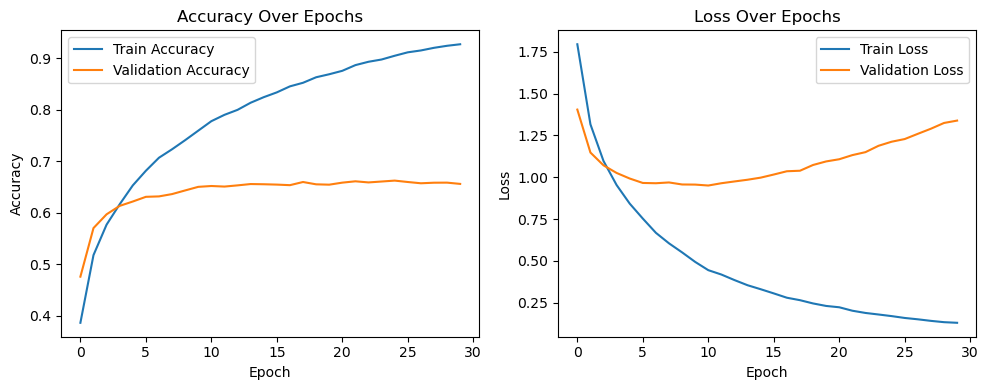

✅ Model saved as 'hybrid_classifier_model.h5'


In [49]:
# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === STEP 7: Plot Accuracy and Loss ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# === STEP 8: Save the Model ===
model.save("hybrid_classifier_model.h5")
print("✅ Model saved as 'hybrid_classifier_model.h5'")


492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1152
           1       0.56      0.48      0.52      3193
           2       0.46      0.42      0.44       775
           3       0.57      0.64      0.60      4613
           4       0.61      0.54      0.57       833
           5       0.43      0.25      0.32       323
           6       0.86      0.91      0.88      4826

    accuracy                           0.66     15715
   macro avg       0.60      0.55      0.57     15715
weighted avg       0.66      0.66      0.66     15715

Confusion Matrix:
 [[ 692   29   56  213   56   10   96]
 [  23 1530   48 1299   44   15  234]
 [  57   65  327  206   20   15   85]
 [ 121  950  158 2955  125   46  258]
 [  36   53   25  231  448   11   29]
 [  15   32   14  137   20   82   23]
 [  33   82   86  185   24   12 4404]]
Accuracy Score: 0.664206172446707


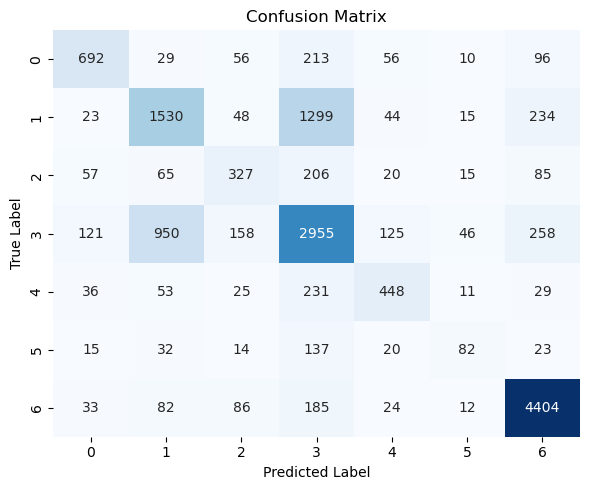

In [53]:
# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === Plot Confusion Matrix ===
plt.figure(figsize=(6, 5))
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1152
           1       0.56      0.48      0.52      3193
           2       0.46      0.42      0.44       775
           3       0.57      0.64      0.60      4613
           4       0.61      0.54      0.57       833
           5       0.43      0.25      0.32       323
           6       0.86      0.91      0.88      4826

    accuracy                           0.66     15715
   macro avg       0.60      0.55      0.57     15715
weighted avg       0.66      0.66      0.66     15715

Confusion Matrix:
 [[ 692   29   56  213   56   10   96]
 [  23 1530   48 1299   44   15  234]
 [  57   65  327  206   20   15   85]
 [ 121  950  158 2955  125   46  258]
 [  36   53   25  231  448   11   29]
 [  15   32   14  137   20   82   23]
 [  33   82   86  185   24   12 4404]]
Accuracy Score: 0.664206172446707


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3078 (\N{TELUGU LETTER AA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Telugu natively.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3074 (\N{TELUGU SIGN ANUSVARA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3110 (\N{TELUGU LETTER DA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3147 (\N{TELUGU VOWEL SIGN OO}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3123 (\N{TELUGU LETTER LLA}) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils

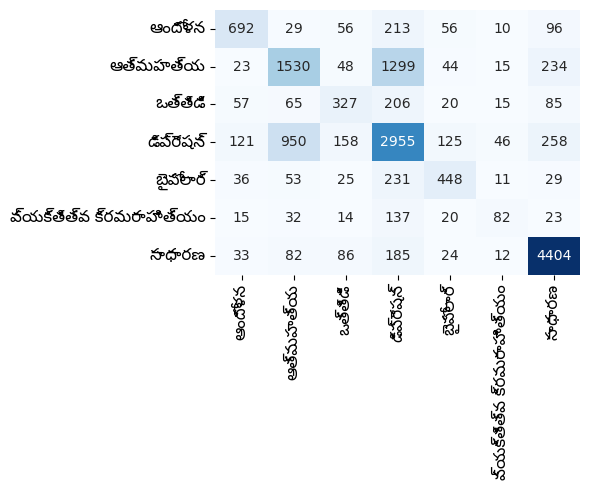

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# === STEP 6: Evaluate Model ===
y_pred_probs = model.predict([X_test_tfidf.toarray(), X_test_dense])
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Classification Report ===")
print(classification_report(test_y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred))
print("Accuracy Score:", accuracy_score(test_y, y_pred))

# === Load Telugu Font ===
telugu_font_path = r"C:\Users\DELL\Downloads\Noto_Sans_Telugu (2)\NotoSansTelugu-VariableFont_wdth,wght.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path, size=12)

# === Get Telugu Labels from Label Encoder ===
class_labels = label_encoder.classes_

# === Plot Confusion Matrix with Telugu Labels ===
plt.figure(figsize=(6, 5))
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)



plt.xticks(rotation=90, fontproperties=telugu_font)
plt.yticks(rotation=0, fontproperties=telugu_font)
plt.tight_layout()
plt.show()


In [88]:
import pandas as pd

# Decode the labels
actual_labels = label_encoder.inverse_transform(test_y[:10])
predicted_labels = label_encoder.inverse_transform(y_pred[:10])

# Create DataFrame
results_df = pd.DataFrame({
    'Predicted Labels': predicted_labels,
    'Actual Labels': actual_labels
})

# Print as a clean DataFrame (like screenshot)
print("First 10 Predictions:\n")
print(results_df)


First 10 Predictions:

  Predicted Labels Actual Labels
0           సాధారణ        సాధారణ
1        డిప్రెషన్      బైపోలార్
2        డిప్రెషన్     డిప్రెషన్
3           సాధారణ        సాధారణ
4           సాధారణ        సాధారణ
5        డిప్రెషన్      ఆత్మహత్య
6        డిప్రెషన్     డిప్రెషన్
7        డిప్రెషన్     డిప్రెషన్
8           సాధారణ        సాధారణ
9           సాధారణ        సాధారణ
